# <center> FIFA20 Game Data Analytics With Python

### Task 1. Importing the libraries
- Import Data
- Get the shape of data
- Display first 5 rows of data
- Get the columns of data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\players.csv")
print("shape{}".format(np.shape(data)))
data.head(5)

shape(18278, 104)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
#data.isnull().sum()
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

### Task 2. Drop Useless Columns
Useless columns - ['dob','sofifa_id', 'player_url', 'long_name', 'body_type',
'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number']

In [4]:
df=data.drop(['dob','sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'], axis=1)
df.head(1)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


### Task 3. Data Preprocessing - Part 1
- Calculate Body Mass Index (BMI) of each player
- Display first 10 rows of Player Name with its Position

In [5]:
df.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [6]:
df['BMI']=df['weight_kg']/pow((df[('height_cm')]/100),2)
df.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,22.204082
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.615211
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,24.163265
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,21.366869
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.307244
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,...,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3,24.698650
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,...,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3,22.309356
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,...,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3,23.183673


In [7]:
print("Display first 10 rows of Player Name with its Position\n")
player_position=df[['short_name','player_positions']]
player_position.head(10)

Display first 10 rows of Player Name with its Position



,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
5,K. De Bruyne,"CAM, CM"
6,M. ter Stegen,GK
7,V. van Dijk,CB
8,L. Modrić,CM
9,M. Salah,"RW, ST"


### Task 4. Data Preprocessing - Part 2
- Create DataFrame of each field positions and add prefix as (Position_)
- Concate above DataFrame with our original DataFrame

In [8]:
new_player_positions=df['player_positions'].str.get_dummies(sep=',').add_prefix('Postions_')
new_player_positions.head()

,Postions_ CAM,Postions_ CB,Postions_ CDM,Postions_ CF,Postions_ CM,Postions_ LB,Postions_ LM,Postions_ LW,Postions_ LWB,Postions_ RB,...,Postions_GK,Postions_LB,Postions_LM,Postions_LW,Postions_LWB,Postions_RB,Postions_RM,Postions_RW,Postions_RWB,Postions_ST
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
df=pd.concat([df,new_player_positions],axis=1)
df.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,Postions_GK,Postions_LB,Postions_LM,Postions_LW,Postions_LWB,Postions_RB,Postions_RM,Postions_RW,Postions_RWB,Postions_ST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0


### Task 5. Data Preprocessing - Part 3
- Clean Position Ratings Column
    - Rating Columns - ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb']
    - Fill Empty values = 0
    - Make Data-type as = Integer
    
    
- Fill Missing Values of Skills
    - Skills - ["dribbling", "defending", "physic", "passing", "shooting", "pace"]
    - Fill Missing Values = As Median

In [10]:
columns= ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb']
df[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [11]:
for column in columns:
    df[column]=df[column].str.split('+', n=1,expand=True)[0]
df[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61


In [12]:
df[columns]=df[columns].fillna(0)

In [13]:
df[columns]=df[columns].astype(int)
df[column].head()

0    63
1    61
2    61
3     0
4    61
Name: rb, dtype: int32

In [14]:
df[column].head()

0    63
1    61
2    61
3     0
4    61
Name: rb, dtype: int32

### Task 6. Create Scatter Plot for (Overall Rating vs Value in Euros) [colored by Age]

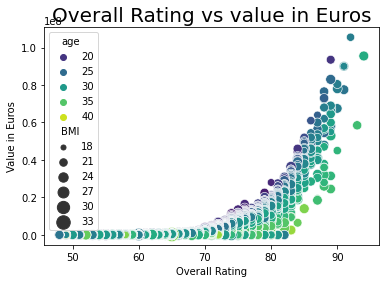

In [15]:
sns.scatterplot(x='overall',y='value_eur',hue='age', palette='viridis', size='BMI', sizes=(15,200), data=df)
plt.title('Overall Rating vs value in Euros',fontsize=20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

### Task 7. Create Pie chart proportion of (right-foot players vs left-foot players)

([<matplotlib.patches.Wedge at 0x21341f662e0>,
 [Text(0.8107034305160365, 0.7434782765821273, 'Left'),
  Text(-0.8844037044123334, -0.8110672522187923, 'Right')],
 [Text(0.44220187119056537, 0.40553360540843303, '23.62%'),
  Text(-0.5159021609071945, -0.47312256379429546, '76.38%')])

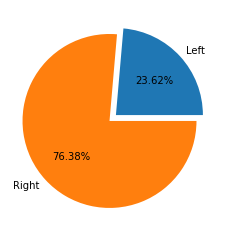

In [16]:
plt.pie(x = df.groupby(['preferred_foot']).preferred_foot.count().to_list(),
        labels = ["Left", "Right"], autopct='%1.2f%%', explode = (0, 0.1))


### Task 8. Create Histogram of Players Ages 

Text(0.5, 1.0, 'Create Histogram of Players Age')

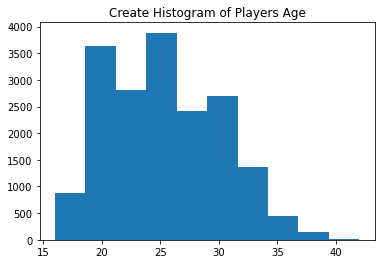

In [17]:
plt.hist(x=df['age'])
plt.title("Create Histogram of Players Age")


In [18]:
for col in df:
    print(col)

short_name
age
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
release_clause_eur
player_tags
team_position
team_jersey_number
joined
contract_valid_until
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding_tackle
goalkeeping_diving
goalkeeping_handling

In [19]:
index=df.groupby('team_position').size().index
values=df.groupby('team_position').size().values
print(index)
print(values)

    
        
        

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB'],
      dtype='object', name='team_position')
[ 311  100  181   14   76  662   23  560  660  411  242   19  398  195
  162   58   23  560  660  411  244 2958   19  399  195  161   58  458
 7820]


In [20]:
attacker = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']
a=[]
d=[]
for players in index:
    for col in attacker:
        if(players== col):
            d.append(col)
            for i in range(len(index)):
                if(index[i]==col):
                    a.append(values[i])
                    
                    
print(a) 
print(d)

[14, 19, 195, 162, 19, 195, 161, 458]
['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST']


### Task 9. Describing the Percentage of Players in different (Attacker) positions
- attacker = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']

([<matplotlib.patches.Wedge at 0x21342182eb0>,
 [Text(1.0992887556910005, 0.03955036803029831, 'CF'),
  Text(1.0919928558475784, 0.13248246215197704, 'LF'),
  Text(0.8618989677671774, 0.6834692161040424, 'LS'),
  Text(-0.01836576710974149, 1.099846670494788, 'LW'),
  Text(-0.5095588508651343, 0.974858850041894, 'RF'),
  Text(-0.9437964070978588, 0.5650206562145963, 'RS'),
  Text(-1.02354272764007, -0.40293955464204023, 'RW'),
  Text(0.42258279625982914, -1.0155903604826229, 'ST')])

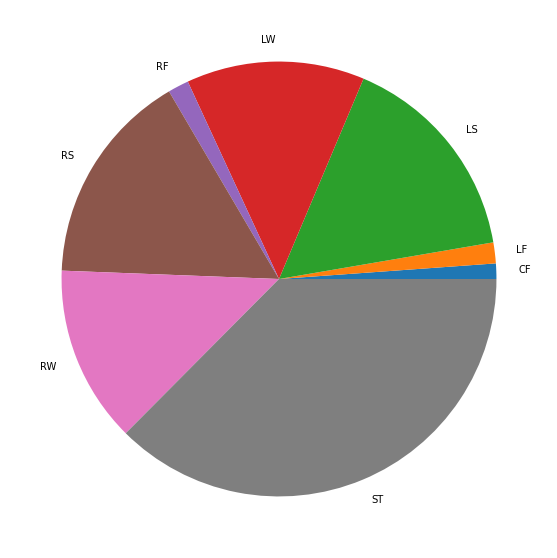

In [21]:


plt.figure(figsize=(20,10))
plt.pie(a, labels = d)



### Task 10. Describing the Percentage of Players in different Midfielder positions
- midfielder = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']

In [22]:
index

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB'],
      dtype='object', name='team_position')

In [23]:
midfielder = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']
mid_value=[]
mid_index=[]
for players in index:
    for col in midfielder:
        if(players== col):
            mid_index.append(col)
            for i in range(len(index)):
                if(index[i]==col):
                    mid_value.append(values[i])
                    
print(mid_value)                    
                    


[311, 181, 76, 23, 411, 242, 398, 23, 411, 244, 399]


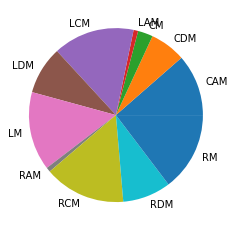

In [24]:
plt.pie(mid_value,labels=mid_index)
plt.show()

### Task 11. Describing the Percentage of Players in different Defender positions
- defender = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']

In [25]:
defender = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']
dif_value=[]
dif_label=[]
for players in index:
    for col in midfielder:
        if(players== col):
            dif_label.append(col)
            for i in range(len(index)):
                if(index[i]==col):
                    dif_value.append(values[i])
                    

([<matplotlib.patches.Wedge at 0x2133f8daf10>,
 [Text(1.029743478242932, 0.38681826355040266, 'CAM'),
  Text(0.6595522546176588, 0.8803356311252905, 'CDM'),
  Text(0.3731019743188538, 1.034792209460128, 'CM'),
  Text(0.2525551377475847, 1.0706147310761693, 'LAM'),
  Text(-0.2931830413891565, 1.0602092737954165, 'LCM'),
  Text(-0.9397751814296246, 0.5716840109439097, 'LDM'),
  Text(-1.0795859642313343, -0.2109363549384033, 'LM'),
  Text(-0.8557530463670686, -0.6911488433278913, 'RAM'),
  Text(-0.41816149548392345, -1.0174187749863126, 'RCM'),
  Text(0.39454083756413677, -1.0268093919974581, 'RDM'),
  Text(0.9851623200311618, -0.4893416017372925, 'RM')])

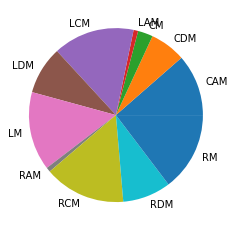

In [26]:
plt.pie(dif_value,labels=dif_label)


In [27]:
df['value_eur']


0         95500000
1         58500000
2        105500000
3         77500000
4         90000000
           ...    
18273        40000
18274        40000
18275        40000
18276        40000
18277        40000
Name: value_eur, Length: 18278, dtype: int64

### Task 12. Top 10 players based on the player position and the player value in euro

In [28]:
top_10_value=df['value_eur'].nlargest(n=10).to_list()
top_10_value

[105500000,
 95500000,
 93500000,
 90000000,
 90000000,
 83000000,
 80500000,
 78000000,
 77500000,
 76500000]

In [29]:
print(defender)
print(midfielder)
print(attacker)
list=df['team_position'].value_counts().index
new=list[0:11]
new


['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']
['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM', 'CM', 'LAM']
['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']


Index(['SUB', 'RES', 'GK', 'RCB', 'LCB', 'RB', 'LB', 'ST', 'RCM', 'LCM', 'RM'], dtype='object')

In [30]:
df[df['value_eur'].isin([105500000,
 95500000,
 93500000,
 90000000,
 90000000,
 83000000,
 80500000,
 78000000,
 77500000,
 76500000])]
    

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,Postions_GK,Postions_LB,Postions_LM,Postions_LW,Postions_LWB,Postions_RB,Postions_RM,Postions_RW,Postions_RWB,Postions_ST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,0,0,0,0,0,0,0,0,0,0
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,...,0,0,0,0,0,0,0,0,0,0
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,...,0,0,0,0,0,0,0,1,0,0
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,...,0,0,0,0,0,0,0,0,0,1
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,...,0,0,0,0,0,0,0,0,0,1
23,P. Dybala,25,177,75,Argentina,Juventus,88,92,76500000,215000,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_new=df[df['value_eur'].isin([105500000,
 95500000,
 93500000,
 90000000,
 90000000,
 83000000,
 80500000,
 78000000,
 77500000,
 76500000])]



In [32]:
df_new[['short_name','age','overall','team_position','player_positions','value_eur']]

,short_name,age,overall,team_position,player_positions,value_eur
0,L. Messi,32,94,RW,"RW, CF, ST",95500000
2,Neymar Jr,27,92,CAM,"LW, CAM",105500000
3,J. Oblak,26,91,GK,GK,77500000
4,E. Hazard,28,91,LW,"LW, CF",90000000
5,K. De Bruyne,28,91,RCM,"CAM, CM",90000000
7,V. van Dijk,27,90,LCB,CB,78000000
9,M. Salah,27,90,RW,"RW, ST",80500000
10,K. Mbappé,20,89,RW,"ST, RW",93500000
12,H. Kane,25,89,ST,ST,83000000
23,P. Dybala,25,88,RW,"CAM, RW",76500000


In [33]:
def top_10(pos,value):
    if((pos in df_new['team_position'].unique()) and (value in df_new['value_eur'].unique())):
             return "yes"
    else:
        return "no"

In [34]:
top_10('RW',95500000)

'yes'

In [35]:
top_10('CM',77500000)

'no'